In [1]:
%%html
<style>
.dataframe td,.dataframe thead th { 
    note:'pandas表格属性';
    white-space: auto;
    text-align:left;
    border:1px solid;
    font-size:12px
}
.input_prompt{
    note:'隐藏cell左边的提示如 In[12]以便于截图';
#     display:none;
}
div.output_text {
    note:'输出内容的高度';
    max-height: 500px;
}
div.output_area img{
    note:'输出图片的宽度';
    max-width:100%
}
div.output_scroll{
    note:'禁用输出的阴影';
    box-shadow: none;
}
</style>
<h5>!!以上是作者为了排版而修改的排版效果，请注意是否需要使用!!</h5>

In [2]:
# 修改pandas默认的现实设置
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',10)  
pd.set_option('display.max_rows',20)  
#禁用科学计数法
np.set_printoptions(suppress=True,   precision=10,  threshold=2000,  linewidth=150)  
pd.set_option('display.float_format',lambda x : '%.2f' % x)

## 生成示例数据集

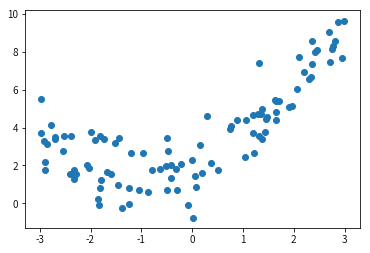

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

## 线性回归拟合

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

## 均方误差判断拟合程度

In [8]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 绘制拟合结果

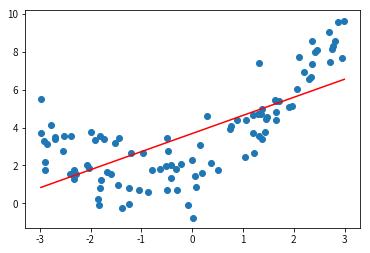

In [9]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 封装 Pipeline 管道

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def PolynomialRegression(degree):
    return Pipeline([('poly', PolynomialFeatures(degree=degree)),
                     ('std_scaler', StandardScaler()),
                     ('lin_reg', LinearRegression())])

## 使用degree=2拟合

In [16]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
# 比较真值和预测值的均方误差
mean_squared_error(y, y2_predict)
# 输出：1.0987392142417856

1.0987392142417856

## 绘制degree=2拟合拟合结果

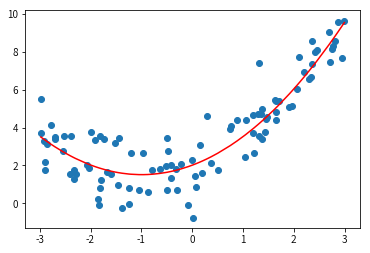

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

## degree=10拟合

1.050846676376415

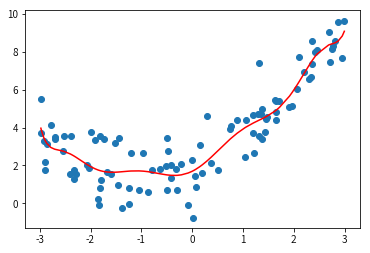

In [22]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
display(mean_squared_error(y, y10_predict))

plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

## degree=10拟合

0.6825402438876115

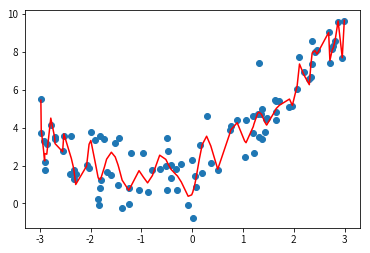

In [21]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
display(mean_squared_error(y, y100_predict))

plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

## 加入正则化项后的代价函数
$\frac{1}{2}\sum_{j=1}^N\{y_i-w^T\sigma(x_j)\}^2+\frac{\lambda}{2}\sum_{j=1}^N|w_j|_q$

## L2正则化
$J=J_0+\alpha\sum w^2$

## L1正则化
$J=J_0+\alpha\sum |w|$

## 岭回归
$J(\theta)=MSE(y,\hat{y};\theta)+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$

## LASSO回归
$J(\theta)=MSE(y,\hat{y};\theta)+\alpha\sum_{i=1}^n|\theta_i|$

## 平均绝对误差MAE公式
$MAE=\frac{1}{n}\sum_{i=1}^n|f_i-y_i|=\frac{1}{n}\sum_{i=1}^n|e_i|$

## 平均绝对误差MAE示意代码
```
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)
```

## 均方误差MSE
$MSE=\frac{1}{n}\sum_{i=1}^{n}(observed_i-predicted_i)^2$

## 均方误差MSE代码示意
```
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

```

## 均方根误差RMSE公式
$RMSE=\sqrt{MSE}=\sqrt{SSE/N}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}w_i(y_i-\hat{y_i})^2}$

## 均方根误差RMSE示意代码
```
from sklearn.metrics import mean_squared_error
Pred_Error = mean_squared_error(y_test, y_pred)
Sqrt(Pred_Error)
```

## R平方值
$R^2(y,\hat{y})=1-\frac{\sum_{i=0}^{n_{samples}-1}(y_i-\hat{y_i})^2}{\sum_{i=0}^{n_{samples}-1}(y_i-\bar{y_i})^2}$

## R方值示意代码
```
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```

## 交叉验证（附带说明）

### 交叉验证迭代器

**K折交叉验证**： KFold 将所有的样例划分为 k 个组，称为折叠 (fold) （如果 k = n， 这等价于 Leave One Out（留一） 策略），都具有相同的大小（如果可能）。预测函数学习时使用 k - 1 个折叠中的数据，最后一个剩下的折叠会用于测试。

**K折重复多次**： RepeatedKFold 重复 K-Fold n 次。当需要运行时可以使用它 KFold n 次，在每次重复中产生不同的分割。

**留一交叉验证**： LeaveOneOut (或 LOO) 是一个简单的交叉验证。每个学习集都是通过除了一个样本以外的所有样本创建的，测试集是被留下的样本。 因此，对于 n 个样本，我们有 n 个不同的训练集和 n 个不同的测试集。这种交叉验证程序不会浪费太多数据，因为只有一个样本是从训练集中删除掉的:

**留P交叉验证**： LeavePOut 与 LeaveOneOut 非常相似，因为它通过从整个集合中删除 p 个样本来创建所有可能的 训练/测试集。对于 n 个样本，这产生了 {n \choose p} 个 训练-测试 对。与 LeaveOneOut 和 KFold 不同，当 p > 1 时，测试集会重叠。

**用户自定义数据集划分： ShuffleSplit** 迭代器将会生成一个用户给定数量的独立的训练/测试数据划分。样例首先被打散然后划分为一对训练测试集合。

**设置每次生成的随机数相同**： 可以通过设定明确的 random_state ，使得伪随机生成器的结果可以重复。

### 基于类标签、具有分层的交叉验证迭代器

如何解决样本不平衡问题？ 使用StratifiedKFold和StratifiedShuffleSplit 分层抽样。 一些分类问题在目标类别的分布上可能表现出很大的不平衡性：例如，可能会出现比正样本多数倍的负样本。在这种情况下，建议采用如 StratifiedKFold 和 StratifiedShuffleSplit 中实现的分层抽样方法，确保相对的类别频率在每个训练和验证 折叠 中大致保留。

**StratifiedKFold**是 k-fold 的变种，会返回 stratified（分层） 的折叠：每个小集合中， 各个类别的样例比例大致和完整数据集中相同。

**StratifiedShuffleSplit**是 ShuffleSplit 的一个变种，会返回直接的划分，比如： 创建一个划分，但是划分中每个类的比例和完整数据集中的相同。

### 用于分组数据的交叉验证迭代器

如何进一步测试模型的泛化能力？ 留出一组特定的不属于测试集和训练集的数据。有时我们想知道在一组特定的 groups 上训练的模型是否能很好地适用于看不见的 group 。为了衡量这一点，我们需要确保验证对象中的所有样本来自配对训练折叠中完全没有表示的组。

**GroupKFold**是 k-fold 的变体，它确保同一个 group 在测试和训练集中都不被表示。 例如，如果数据是从不同的 subjects 获得的，每个 subject 有多个样本，并且如果模型足够灵活以高度人物指定的特征中学习，则可能无法推广到新的 subject 。 GroupKFold 可以检测到这种过拟合的情况。

**LeaveOneGroupOut**是一个交叉验证方案，它根据第三方提供的 array of integer groups （整数组的数组）来提供样本。这个组信息可以用来编码任意域特定的预定义交叉验证折叠。

每个训练集都是由除特定组别以外的所有样本构成的。

**LeavePGroupsOut**类似于 LeaveOneGroupOut ，但为每个训练/测试集删除与 P 组有关的样本。

**GroupShuffleSplit**迭代器是 ShuffleSplit 和 LeavePGroupsOut 的组合，它生成一个随机划分分区的序列，其中为每个分组提供了一个组子集。

### 时间序列分割

**TimeSeriesSplit**是 k-fold 的一个变体，它首先返回 k 折作为训练数据集，并且 (k+1) 折作为测试数据集。 请注意，与标准的交叉验证方法不同，连续的训练集是超越前者的超集。 另外，它将所有的剩余数据添加到第一个训练分区，它总是用来训练模型。


## 简单交叉验证Hold-Out-Method

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split（iris.data, iris.target, test_size=.4, random_state=0)
```

## K折交叉验证K-Fold-CV
```
from sklearn.model_selection import Kfold 
kf = KFold(n_splits=10)
```

## 留一法交叉验证LOO-CV
```
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut()
```

## 留P法交叉验证LPO-CV
```
from sklearn.model_selection import LeavePOut 
lpo = LeavePOut(p=5)

```

## 数据分割算法示例

In [6]:
from sklearn.model_selection import train_test_split # 交叉验证所需的函数
from sklearn.model_selection import cross_val_score  # 交叉验证所需的函数
from sklearn.model_selection import cross_validate  # 交叉验证所需的函数
from sklearn.model_selection import KFold, LeaveOneOut  
from sklearn.model_selection import LeavePOut, ShuffleSplit  
# 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold # 分层分割
from sklearn.model_selection import StratifiedShuffleSplit  # 分层分割
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut 
from sklearn.model_selection import LeavePGroupsOut, GroupShuffleSplit  
from sklearn.model_selection import TimeSeriesSplit  
# 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：', iris.data.shape, iris.target.shape)

# =====数据集划分,训练模型=====
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4,
    random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：', X_train.shape, y_train.shape)  # 训练集样本大小
print('测试集大小：', X_test.shape, y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)  # 使用训练集训练模型
print('准确率：', clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）

#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(
    X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed,
                                        y_train)  # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# =====直接调用交叉验证评估模型=====
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" %
      (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# =====多种度量结果=====
scoring = ['precision_macro',
           'recall_macro']  # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf,
                        iris.data,
                        iris.target,
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
sorted(scores.keys())
print('测试结果：', scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）

# =====K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证=====
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# =====分层K折交叉验证、分层随机交叉验证=====
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break

# =====组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split=====
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))

# =====时间序列分割=====
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.9666666667 1.           0.9666666667 0.9666666667 1.          ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0.0007252693, 0.0003640652, 0.0003199577, 0.0004220009, 0.000346899 ]), 'score_time': array([0.0010209084, 0.0009698868, 0.0009701252, 0.0010108948, 0.0009820461]), 'test_precision_macro': array([0.9696969697, 1.          , 0.9696969697, 0.9696969697, 1.          ]), 'train_precision_macro': array([0.976744186 , 0.976744186 , 0.9918699187, 0.9841269841, 0.9833333333]), 'test_recall_macro': array([0.9666666667, 1.          , 0.9666666667, 0.9666666667, 1.          ]), 'train_recall_macro': array([0.975       , 0.975       , 0.9916666667, 0.9833333333, 0.9833333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(99,) (51,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7

## 网格搜索示例

In [34]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)
print("Size of training set:{} size of testing set:{}".format(
    X_train.shape[0], X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)  #对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:  #找到表现最好的参数
            best_score = score
            best_parameters = {'gamma': gamma, 'C': C}
####   grid search end
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


### Grid Search with Cross Validation

In [72]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set:{} size of validation set:{} size of testing set:{}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
svm = SVC(**best_parameters) #使用最佳参数，构建新的模型
svm.fit(X_trainval,y_trainval) #使用训练集和验证集进行训练，more data always results in good performance.
test_score = svm.score(X_test,y_test) # evaluation模型评估
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.2f}".format(test_score))

Size of training set:84 size of validation set:28 size of testing set:38
Best score on validation set:0.96
Best parameters:{'gamma': 0.001, 'C': 10}
Best score on test set:0.92


In [73]:
from sklearn.model_selection import cross_val_score

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5) #5折交叉验证
        score = scores.mean() #取平均数
        if score > best_score:
            best_score = score
            best_parameters = {"gamma":gamma,"C":C}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Score on testing set:{:.2f}".format(test_score))

Best score on validation set:0.97
Best parameters:{'gamma': 0.01, 'C': 100}
Score on testing set:0.97


交叉验证经常与网格搜索进行结合，作为参数评价的一种方法，这种方法叫做grid search with cross validation。sklearn因此设计了一个这样的类GridSearchCV，这个类实现了fit，predict，score等方法，被当做了一个estimator，使用fit方法，该过程中：（1）搜索到最佳参数；（2）实例化了一个最佳参数的estimator；

In [74]:
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


## 学习曲线和验证曲线

### 学习曲线

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [76]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

<module 'matplotlib.pyplot' from '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

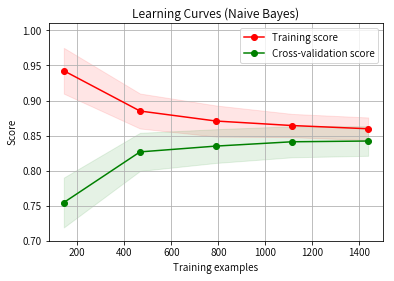

In [77]:
digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

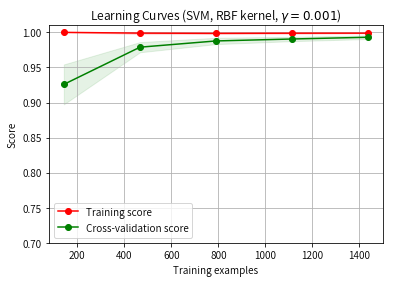

In [78]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

### 验证曲线

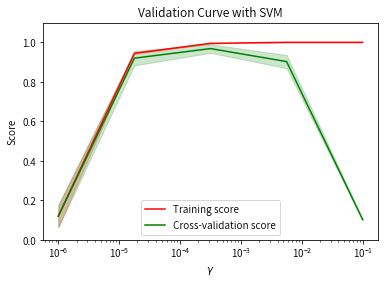

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

## 基础代码

In [70]:
## 导入工具
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor  #决策树回归
from sklearn.ensemble import RandomForestRegressor  #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb  #lightGbm模型
from sklearn.model_selection import train_test_split  # 切分数据
from sklearn.metrics import mean_squared_error  #评价指标
from sklearn.linear_model import SGDRegressor

In [71]:
## 读取数据
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"
train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [40]:
## 归一化处理
from sklearn import preprocessing 
features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])
train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])
train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns
test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns
train_data_scaler['target'] = train_data['target']

In [41]:
#PCA方法降维
from sklearn.decomposition import PCA   #主成分分析法
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [45]:
#保留16维特征并切分数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

## 欠拟合情况

In [46]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.151463981412985
SGDRegressor test MSE:    0.15582443408189456


## 过拟合情况

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, 
                                 clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, 
                                clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1330248157674981
SGDRegressor test MSE:    0.14559928859802745


## 正常拟合

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13423885909686148
SGDRegressor test MSE:    0.1427494025552031


### 模型正则化

**L2范数正则化**

In [49]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13323787756476335
SGDRegressor test MSE:    0.14187259762046708


**L1范数正则化**

In [51]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13511036183307598
SGDRegressor test MSE:    0.14332864452241414


**ElasticNet L1和L2范数加权正则化**

In [52]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.134126088117691
SGDRegressor test MSE:    0.142323868708248


### 模型交叉验证

**简单交叉验证 Hold-out-menthod**

In [55]:
# 简单交叉验证
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14161348155004896
SGDRegressor test MSE:    0.14710821468956675


**K折交叉验证 K-fold CV**

In [56]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')

0  折 SGDRegressor train MSE:    0.14987519063138968
0  折 SGDRegressor test MSE:    0.1060328439968145 

1  折 SGDRegressor train MSE:    0.13348513688408262
1  折 SGDRegressor test MSE:    0.18223249632622965 

2  折 SGDRegressor train MSE:    0.14726773006341226
2  折 SGDRegressor test MSE:    0.1333875735612879 

3  折 SGDRegressor train MSE:    0.14070672027424191
3  折 SGDRegressor test MSE:    0.16188645467771542 

4  折 SGDRegressor train MSE:    0.1387380473396963
4  折 SGDRegressor test MSE:    0.16578847813134126 



**留一法**

In [57]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data, test_data, train_target, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n')
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.1416361883685269
0  个 SGDRegressor test MSE:    0.010073006442686173 

1  个 SGDRegressor train MSE:    0.14150088537573924
1  个 SGDRegressor test MSE:    0.12223831229426645 

2  个 SGDRegressor train MSE:    0.14151483414511198
2  个 SGDRegressor test MSE:    0.03860355577845687 

3  个 SGDRegressor train MSE:    0.14159754755399034
3  个 SGDRegressor test MSE:    0.0036852651965835117 

4  个 SGDRegressor train MSE:    0.1416319203961655
4  个 SGDRegressor test MSE:    0.012302690522310006 

5  个 SGDRegressor train MSE:    0.14092006868236745
5  个 SGDRegressor test MSE:    0.14565501477002468 

6  个 SGDRegressor train MSE:    0.1415255897987022
6  个 SGDRegressor test MSE:    0.02482892017395111 

7  个 SGDRegressor train MSE:    0.14100323573907528
7  个 SGDRegressor test MSE:    0.0013065832128669186 

8  个 SGDRegressor train MSE:    0.14158099844010494
8  个 SGDRegressor test MSE:    0.08967848274344706 

9  个 SGDRegressor train MSE:    0.14171420289072534


**留P法 LPO CV**

In [59]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data, test_data, train_targetarget, test_target = train.values[
        train_index], train.values[test_index], target[train_index], target[
            test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3)
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n')
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.14190833532181063
0  10个 SGDRegressor test MSE:    0.04941961238187924 

1  10个 SGDRegressor train MSE:    0.14138481844698866
1  10个 SGDRegressor test MSE:    0.04372153210164471 

2  10个 SGDRegressor train MSE:    0.14205969283287678
2  10个 SGDRegressor test MSE:    0.04594238283760854 

3  10个 SGDRegressor train MSE:    0.141949223537575
3  10个 SGDRegressor test MSE:    0.05446609330153962 

4  10个 SGDRegressor train MSE:    0.14194814408072978
4  10个 SGDRegressor test MSE:    0.06901778463810983 

5  10个 SGDRegressor train MSE:    0.1419081890636233
5  10个 SGDRegressor test MSE:    0.0451405014060003 

6  10个 SGDRegressor train MSE:    0.14197777894847222
6  10个 SGDRegressor test MSE:    0.049461335330664456 

7  10个 SGDRegressor train MSE:    0.14192898721929645
7  10个 SGDRegressor test MSE:    0.05282934484860422 

8  10个 SGDRegressor train MSE:    0.14197706873590443
8  10个 SGDRegressor test MSE:    0.04731840934915386 

9  10个 SGDRegressor tr

### 模型超参空间及调参

**穷举网格搜索**

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [1, 2, 3]}
clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.256107108970348


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**随机参数优化**

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data, test_data, train_target, test_target = train_test_split(
    train, target, test_size=0.2, random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [1, 2, 3, 4, 5]
}
clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)
score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19636861894590119


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**Lgb 调参**

In [62]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]}
clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor GridSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.1498258125289947


**Lgb 线下验证**

In [66]:
train_data2 = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt', sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

# lgb 模型
from sklearn.model_selection import KFold
import lightgbm as lgb
import numpy as np

# 5折交叉验证
Folds = 5
kf = KFold(n_splits=Folds, shuffle=True, random_state=2019)
# 记录训练和预测MSE
MSE_DICT = {'train_mse': [], 'test_mse': []}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[
        test_index]
    y_train_KFold, y_test_KFold = train_data2_target[
        train_index], train_data2_target[test_index]
    # 训练模型
    lgb_reg.fit(X=X_train_KFold,
                y=y_train_KFold,
                eval_set=[(X_train_KFold, y_train_KFold),
                          (X_test_KFold, y_test_KFold)],
                eval_names=['Train', 'Test'],
                early_stopping_rounds=100,
                eval_metric='MSE',
                verbose=50)

    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(
        X_train_KFold, num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(
        X_test_KFold, num_iteration=lgb_reg.best_iteration_)

    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i + 1))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')

    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n',
      np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n',
      np.mean(MSE_DICT['test_mse']), '\n------')

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431
[150]	Train's l2: 0.135301	Test's l2: 0.183515
[200]	Train's l2: 0.0958737	Test's l2: 0.148825
[250]	Train's l2: 0.075642	Test's l2: 0.133187
[300]	Train's l2: 0.0629311	Test's l2: 0.125237
[350]	Train's l2: 0.054088	Test's l2: 0.121321
[400]	Train's l2: 0.0473551	Test's l2: 0.118307
[450]	Train's l2: 0.0418952	Test's l2: 0.116414
[500]	Train's l2: 0.0375119	Test's l2: 0.114863
[550]	Train's l2: 0.0337062	Test's l2: 0.114002
[600]	Train's l2: 0.0303868	Test's l2: 0.112781
[650]	Train's l2: 0.02756	Test's l2: 0.11207
[700]	Train's l2: 0.0250506	Test's l2: 0.111287
[750]	Train's l2: 0.0228758	Test's l2: 0.110742
[800]	Train's l2: 0.0209081	Test's l2: 0.1103
[850]	Train's l2: 0.0191684	Test's l2: 0.109946
[900]	Train's l2: 0.0176066	Test's l2: 0.109759
[950]	Train's l2: 0.0162243	Test's l2: 0.109423
[1000]	Train's l2: 0.014984	Test's l2

[1000]	Train's l2: 0.0150397	Test's l2: 0.099986
[1050]	Train's l2: 0.0138704	Test's l2: 0.0998263
[1100]	Train's l2: 0.0128394	Test's l2: 0.0996427
[1150]	Train's l2: 0.0118688	Test's l2: 0.0996074
[1200]	Train's l2: 0.0110126	Test's l2: 0.0995783
[1250]	Train's l2: 0.0102254	Test's l2: 0.0995361
[1300]	Train's l2: 0.00951201	Test's l2: 0.0993949
[1350]	Train's l2: 0.00884199	Test's l2: 0.0992683
[1400]	Train's l2: 0.00822777	Test's l2: 0.0993064
[1450]	Train's l2: 0.00767529	Test's l2: 0.0992335
[1500]	Train's l2: 0.00712999	Test's l2: 0.0992797
Early stopping, best iteration is:
[1423]	Train's l2: 0.00797142	Test's l2: 0.0992124
第5折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.007971416523938925 
------
------
 预测MSE
 0.09921237825179019 
------

------
 训练MSE
 [0.0014891170026875996, 0.0072898318628357595, 0.0204510246350711, 0.009355847634266076, 0.007971416523938925] 
 0.009311447531759892 
------
------
 预测MSE
 [0.10539809256060707, 0.1326966032163865, 0.10111932554955039, 0.1068219009820

## 学习曲线和验证曲线

### 学习曲线

<module 'matplotlib.pyplot' from '/Users/mac/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

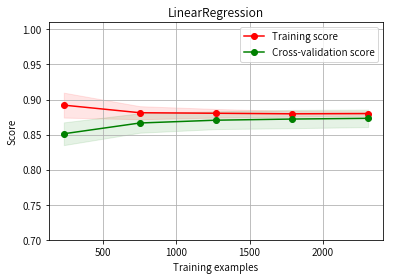

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)


def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values

title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

### 验证曲线

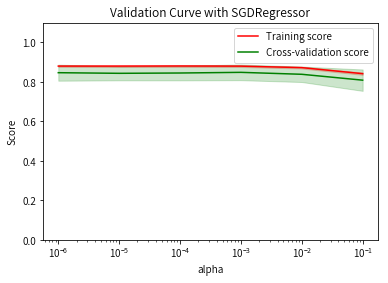

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve
X = train_data2[test_data2.columns].values
y = train_data2['target'].values

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(SGDRegressor(max_iter=1000,
                                                          tol=1e-3,
                                                          penalty='L1'),
                                             X,
                                             y,
                                             param_name="alpha",
                                             param_range=param_range,
                                             cv=10,
                                             scoring='r2',
                                             n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2,
                 color="r")
plt.semilogx(param_range,
             test_scores_mean,
             label="Cross-validation score",
             color="g")
plt.fill_between(param_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2,
                 color="g")
plt.legend(loc="best")
plt.show()